# `DeepFace`

<img src='img/dflogo.png' width=200>

GitHub : https://github.com/serengil/deepface

___
## Информация о библиотеке

DeepFace - легковесный фреймворк для  распознования лиц и анализа :
- возраста
- пола
- эмоций
- расы

Заявленная точность распознования - 97.53%

Использует такие модели искусственного интеллекта :
- VGG-Face
- Facenet
- Facenet512
- OpenFace
- DeepFace
- DeepID
- ArcFace
- Dlib
- SFace

Этапы распознования :

$\boxed{1}$ [Детекция лица](#1)

$\boxed{2}$ Выравнивание

$\boxed{3}$ Нормализация

$\boxed{4}$ [Векторное представление](#4)

$\boxed{5}$ [Распознование](#3)

$\boxed{6}$ [Анализ изображения](#2)


___
## `Скриншот` камеры

In [2]:
import cv2

cam = cv2.VideoCapture(0) # захват видео

while True:
    ret, img = cam.read()
    cv2.imshow("cameraFeed", img) # отображение окна захвата видеокамеры
    button_key = cv2.waitKey(3) # Ожидание нажатия назначенной кнопки
    if button_key == 27: # "esc" -> выход
        break
    if button_key == ord(' '): # "ПРОБЕЛ" -> скриншот
        cv2.imshow("screenshot", cam.read()[1]) # Отображение скриншота на экране
        ret, frame = cam.read() # Чтение скриншота
        cv2.imwrite('img/2/screenshot.jpg',frame) # Запись скриншота

cv2.destroyAllWindows()

___
## `Массив` изображения $\rightarrow$ `pkl`

In [3]:
import cv2
import numpy as np
import pickle


def arr_img_to_bytes(array_img: np.array, num: int = 0, path = 'bin/img/') -> None: 
    """Записывает массив изображения в pickle файл

    Args:
        img (np.array): Numpy массив изображения 
    """
    lst = []
    img_bts = cv2.imencode('.jpg', array_img)[1].tobytes() #  Массив -> bytes
    try:
        current_pkl = pickle.load(open(path + f'img_{num}.pkl', 'rb'))
        current_pkl.append(img_bts)
        pickle.dump(current_pkl, open(path + f'img_{num}.pkl', 'wb'))
    except FileNotFoundError:
        lst.append(img_bts)
    
    # Запись pickle в файл 
        pickle.dump(lst, open(path + f'img_{num}.pkl', 'wb'))


Пример `arr_img_to_bytes()`

In [4]:
img_path = 'img/2/4.jpg'
arr_img = cv2.imread(img_path)
arr_img_to_bytes(arr_img)

img_path = 'img/2/3.jpg'
arr_img = cv2.imread(img_path)
arr_img_to_bytes(arr_img)


img_path = 'img/2/2.jpg'
arr_img = cv2.imread(img_path)
arr_img_to_bytes(arr_img)

img_path = 'img/2/screenshot.jpg'
arr_img = cv2.imread(img_path)
arr_img_to_bytes(arr_img)

___
## `pkl` $\rightarrow$  `массив` изображения

In [4]:
import cv2
import numpy as np
import pickle

def bytes_to_arr_img(path: str) :
    """Выгружает из бинарного файла массив изображения

    Args:
        path (str): Путь к бинарному файлу

    Returns:
        _type_: Numpy массив изображения
    """
    lst_arr_img = []
    lst_img_from_bytes = pickle.load(open(path, 'rb'))
    for array in lst_img_from_bytes: 
        arr = np.frombuffer(array, np.uint8)
        arr_img = cv2.imdecode(arr, cv2.IMREAD_COLOR)
        lst_arr_img.append(arr_img)
    return lst_arr_img

Пример `bytes_to_arr_img()`

In [5]:
import matplotlib.pyplot as plt

lst_arr_img = bytes_to_arr_img('bin/img/img_0.pkl')


`Визуализация` изображений в pkl-файле

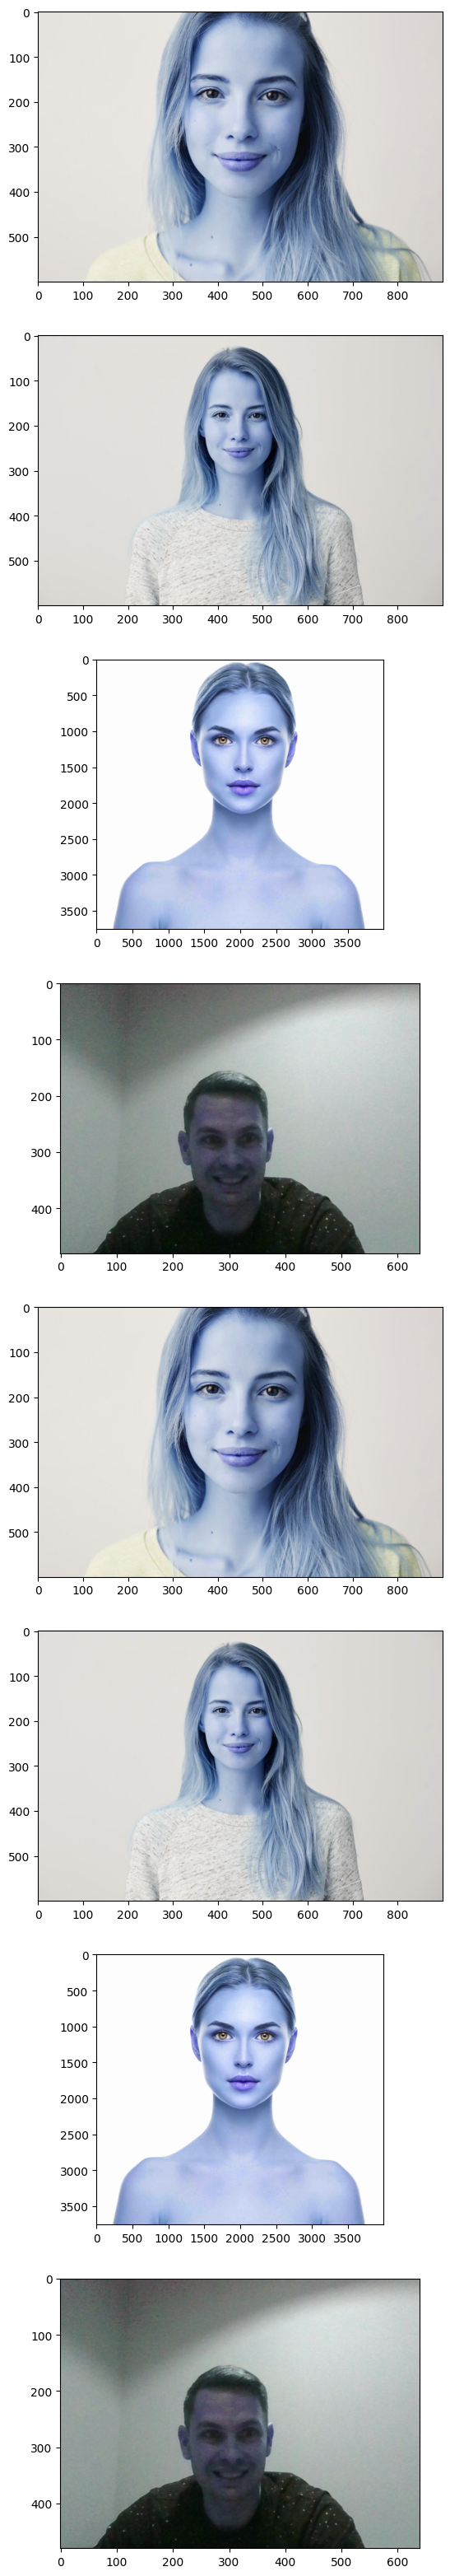

In [6]:
img_count = len(lst_arr_img)
fig, axs = plt.subplots(ncols=1, nrows=img_count,figsize=(20,40))
for num in range(img_count):
    axs[num].imshow(lst_arr_img[num]);

___
## `Массив` изображения $\rightarrow$ <a id = 4>embedding</a>

`Models embeddings` :

- VGG-Face
- Facenet
- Facenet512
- OpenFace
- DeepFace
- DeepID
- ArcFace
- Dlib
- SFace

In [7]:
from deepface import DeepFace
import numpy as np


def get_emb_list(lst_arr: list, embedding_model='VGG-Face') -> list:
    emb_list = []
    for arr in lst_arr_img:
        DF_list = DeepFace.represent(arr, model_name=embedding_model)
        embedding = np.array(DF_list[0]['embedding'])
        emb_list.append(embedding)
        
    return emb_list

Пример `get_emb_list()`

In [8]:
lst_arr_img = bytes_to_arr_img('bin/img/img_0.pkl')
emb_list = get_emb_list(lst_arr_img)
emb_list

[array([0.        , 0.        , 0.03215423, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.07859656, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.        , 0.        , 0.03215423, ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0.07859656, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]),
 array([0., 0., 0., ..., 0., 0., 0.])]

___
## `Embedding` $\rightarrow$ `метрика`

In [10]:
import numpy as np

def get_metrics(compare_emb: np.ndarray, emb_list: list, metric = 'L2') -> dict:
    metrics_dict = {}
    metrics_lst = []
    for arr in emb_list:
        
        if metric == 'L2':
            l2 = np.linalg.norm(compare_emb - arr )
            metrics_lst.append(l2)
        metrics_dict[metric] = metrics_lst

        if metric == 'cosine':
            cosine = (compare_emb @ arr) / (np.linalg.norm(compare_emb) * np.linalg.norm(arr))
            metrics_lst.append(cosine)
        metrics_dict[metric] = metrics_lst
        
    return metrics_dict

Пример `get_metrics()`

In [11]:
l2 = get_metrics(emb_list[0], emb_list)
cosine = get_metrics(emb_list[0], emb_list, metric='cosine')

Визуализация

In [12]:
import pandas as pd

metrics_dict = l2
metrics_dict.update(cosine)
pd.DataFrame(metrics_dict)

L2    cosine
0  0.000000  1.000000
1  0.534809  0.856990
2  1.346569  0.093376
3  1.319240  0.129803
4  0.000000  1.000000
5  0.534809  0.856990
6  1.346569  0.093376
7  1.319240  0.129803

___
## <a id = 3>Распознование</a> `DeepFace`

- 2 изображение на вход :
    - np.array
    - путь к файлам .jpg

- На выходе :
    - Совпадают ли лица, в зависимости от порога значения метрики
    - Значение выбранной метрики
    - Координаты детектированных лиц

In [13]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import pandas as pd

img_1 = 'img/1.jpg'
img_2 = 'img/2.jpg'
model = 'Facenet'
model = 'VGG-Face'
model = 'ArcFace'

response = DeepFace.verify(img_1, img_2, model_name=model)
response

{'verified': False,
 'distance': 0.7075642761454696,
 'threshold': 0.68,
 'model': 'ArcFace',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 193, 'y': 129, 'w': 545, 'h': 545},
  'img2': {'x': 1264, 'y': 525, 'w': 1569, 'h': 1569}},
 'time': 2.58}

___
## <a id = 1>Детектирование лиц</a> `DeepFace`

24-02-14 21:51:54 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.
24-02-14 21:51:54 - ⚠️ Function detectFace is deprecated. Use extract_faces instead.


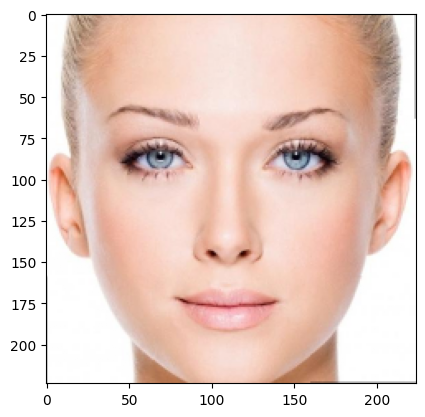

In [14]:
detect1 = DeepFace.detectFace (img_1)
detect2 = DeepFace.detectFace(img_2)
plt.imshow(detect1)

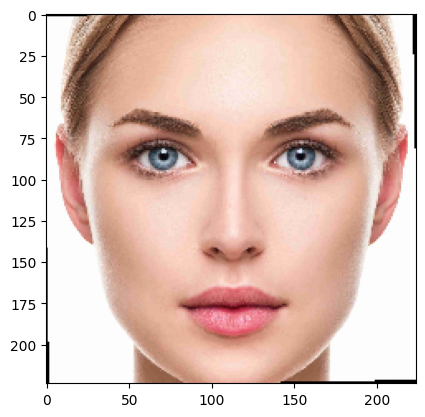

In [15]:
plt.imshow(detect2)

___
## Распознование лица из изображений в папке `DeepFace`

- 1 изображение для поиска и путь к папке с изображениями на вход :

    - Для изображения :
        - np.array
        - путь к файлу .jpg

    - Для папки :
        - путь к файлам .jpg

- На выходе :
    - Название изображения в папке, которое совпадает с исходным
    - Координаты детектированных лиц
    - Значение выбранной метрики

In [16]:
df = DeepFace.find(img_path='img/2/1.jpg', db_path='img/2',model_name=model)
df

24-02-14 21:51:55 - ⚠️ Items ['img/2/screenshot.jpg'] were added into img/2 just after data source img/2/representations_arcface.pkl created!


Finding representations:   0%|          | 0/1 [00:00<?, ?it/s]

Finding representations: 100%|██████████| 1/1 [00:00<00:00,  5.21it/s]


24-02-14 21:51:55 - 1 new representations are just added whereas 0 represented one(s) are just dropped in img/2/representations_arcface.pkl file.
24-02-14 21:51:55 - There are 5 representations found in representations_arcface.pkl
24-02-14 21:51:55 - find function lasts 0.4484879970550537 seconds


[      identity  target_x  target_y  target_w  target_h  source_x  source_y  \
 0  img/2/1.jpg       193       129       545       545       193       129   
 
    source_w  source_h  threshold      distance  
 0       545       545       0.68  2.220446e-16  ]

___
## <a id = 2>Анализ лица на изображении </a>`DeepFace`

- 1 изображение для анализа  :
  - np.array
  - путь к файлу .jpg

- На выходе доминирующее:
  - эмоциональное состояние
  - Возраст
  - Раса

In [17]:
DeepFace.analyze(img_path=img_1, silent=True)

[{'emotion': {'angry': 0.1099279834229668,
   'disgust': 3.2876632249821394e-05,
   'fear': 0.031763014555288606,
   'happy': 1.313691615916298,
   'sad': 1.069471485081734,
   'surprise': 0.0014753864039613776,
   'neutral': 97.4736335905035},
  'dominant_emotion': 'neutral',
  'region': {'x': 193, 'y': 129, 'w': 545, 'h': 545},
  'face_confidence': 9.178145149431657,
  'age': 31,
  'gender': {'Woman': 99.99998807907104, 'Man': 9.012321555701419e-06},
  'dominant_gender': 'Woman',
  'race': {'asian': 0.004833122875425033,
   'indian': 0.0006087042493163608,
   'black': 2.5122307079072925e-05,
   'white': 99.13870692253113,
   'middle eastern': 0.37296118680387735,
   'latino hispanic': 0.4828616976737976},
  'dominant_race': 'white'}]

___
___
Выравнивание

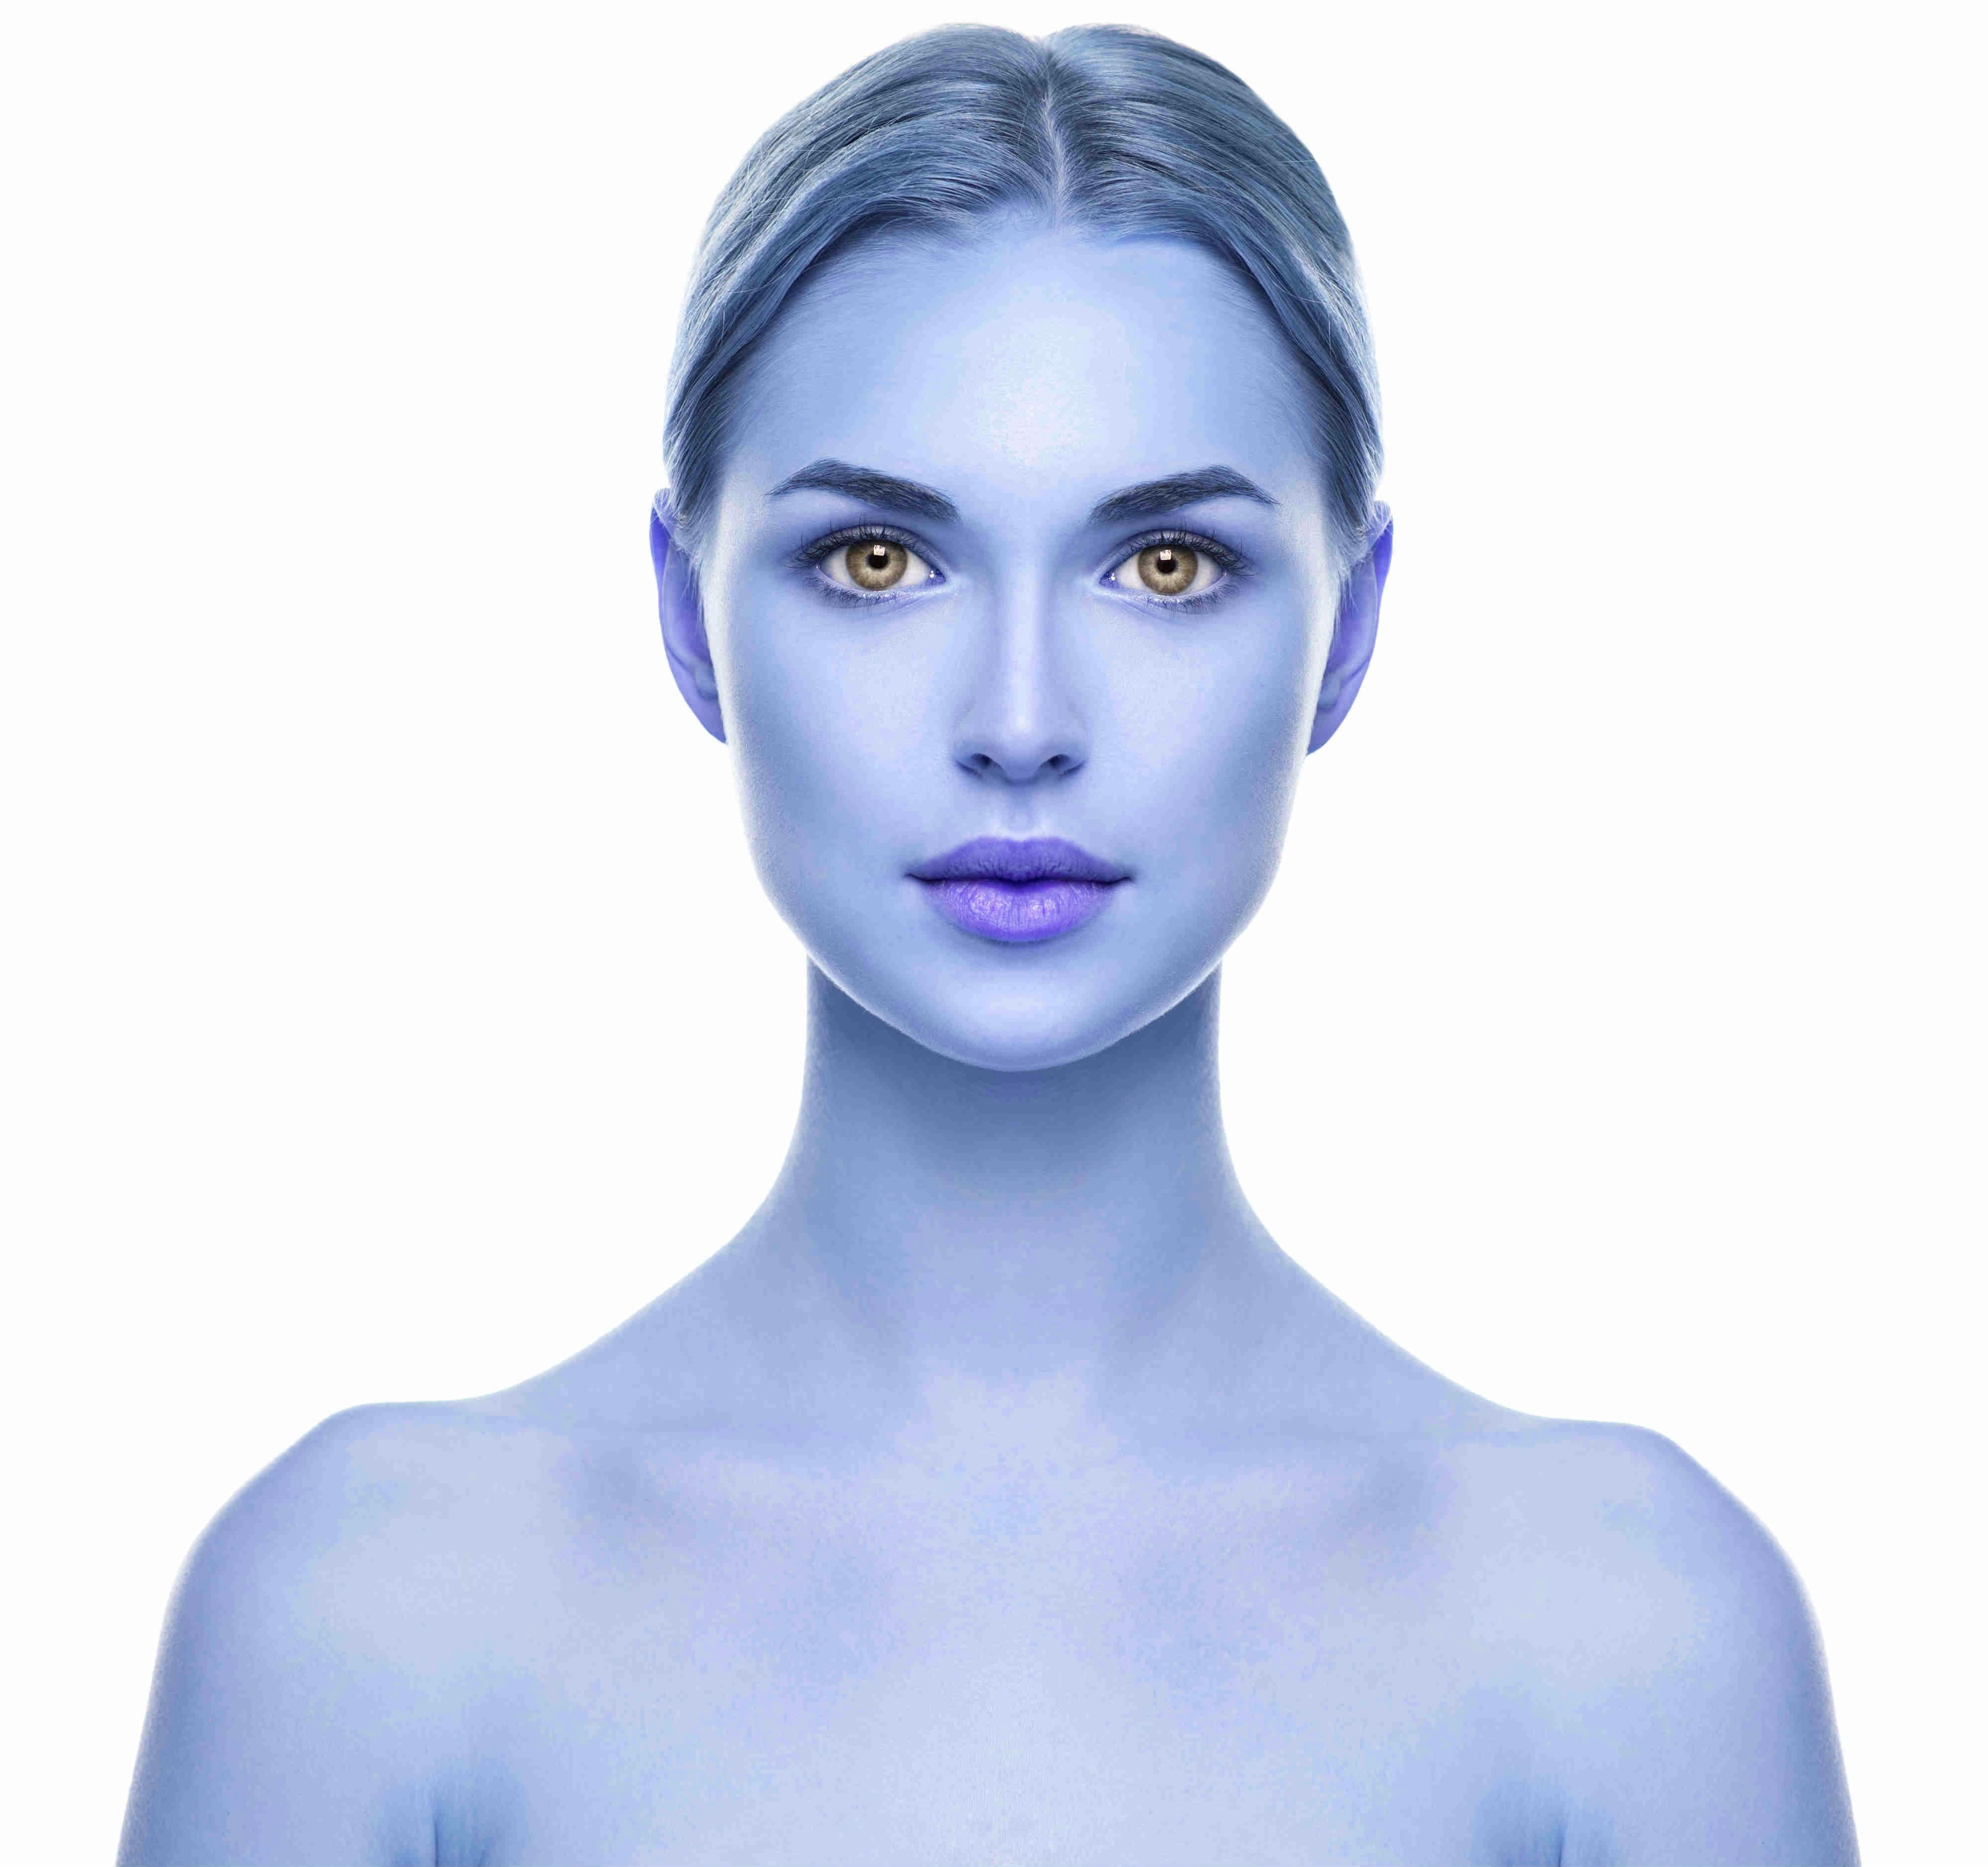

In [18]:
from retinaface import RetinaFace
from PIL import Image
import cv2

img_path = 'img/2.jpg'
img = cv2.imread(img_path)
RetinaFace.detect_faces(img_path=img_1)

Image.fromarray(img)

## Полезные ссылки

datasets : https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/

training : https://sefiks.com/2019/02/13/apparent-age-and-gender-prediction-in-keras/

array : https://stackoverflow.com/questions/67856738/can-deepface-verify-accept-an-image-array-or-pil-image-object

screenshot : https://stackoverflow.com/questions/35302512/why-wont-chr27-work-properly

___
## `pgvector` in Psycopg 2

github pgvector : https://github.com/pgvector/pgvector?tab=readme-ov-file#indexing

github pgvector-PYTHON : https://github.com/pgvector/pgvector-python#psycopg-2

### `Подключение к БД` PostgreSQL

In [139]:
import psycopg2 as pg

conn=pg.connect(
    dbname='postgres',
      user='postgres',
        password= '19435504',
          host='localhost',
          port='5432' )

cursor=conn.cursor()

### `Создание расширения` vector

In [124]:
cursor.execute('CREATE EXTENSION IF NOT EXISTS vector')
conn.commit()

### `Создание таблицы` для эмбедингов embeddings

In [125]:
cursor.execute('CREATE TABLE embeddings (id bigserial PRIMARY KEY, embedding vector(4096))')
conn.commit()

### `Загрузка  эмбединга` в БД

In [140]:
embedding = list(emb_list[1])
cursor.execute('INSERT INTO embeddings (embedding) VALUES (%s)', (embedding,))
conn.commit()

In [144]:
for emb_num in range(len(emb_list)):
    embedding = list(emb_list[emb_num])
    cursor.execute('INSERT INTO embeddings (embedding) VALUES (%s)', (embedding,))
    conn.commit()

### `Поиск` n-ближайших векторов :

- <#> : внутреннее произведение

- <=> : косинусное расстояние

- <-> : L2-расстояние

In [146]:
embedding = list(emb_list[1])
cursor.execute('SELECT * FROM embeddings ORDER BY embedding <-> %s::vector LIMIT 3', (embedding,))
cursor.fetchall()

[(1,
  '[0,0,0,0.017626613,0,0,0.052369367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.020026624,0,0.027280707,0,0,0,0,0.046229806,0,0,0,0.0690649,0,0,0,0,0,0,0,0,0,0,0,0,0.029040603,0.034566298,0.05079809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08992288,0,0,0,0,0,0,0.030785136,0,0,0.06670338,0,0,0,0,0,0.00015435775,0,0,0,0,0,0,0,0.021202102,0.020126842,0,0,0,0,0.058655746,0,0,0,0,0,0,0,0,0,0,0,0.013453716,0,0,0,0,0,0.00058496627,0,0,0,0,0,0,0.018230602,0,0,0,0,0,0.03106774,0,0.13046625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.004284755,0,0,0,0,0,0,0.02944098,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02777129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08376532,0.029421397,0,0,0,0,0,0.012144712,0,0,0,0,0.002865679,0,0,0,0,0,0,0,0,0,0,0,0,0,0.033496514,0,0,0,0,0,0,0,0,0.029691322,0.033464164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.052203886,0,0,0.047583498,0,0,0.02503533,0,0,0,0,0.05481937,0,0,0,0,0,0,0,0,0,0,0,0.057355776,0.0015299419,0,0,0,0,0,0,

### `Поиск` ближайших векторов по значению расстояния:

In [149]:
cursor.execute('SELECT * FROM embeddings WHERE embedding <-> %s::vector < 0.1' , (embedding,));
cursor.fetchall()


[(1,
  '[0,0,0,0.017626613,0,0,0.052369367,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.020026624,0,0.027280707,0,0,0,0,0.046229806,0,0,0,0.0690649,0,0,0,0,0,0,0,0,0,0,0,0,0.029040603,0.034566298,0.05079809,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08992288,0,0,0,0,0,0,0.030785136,0,0,0.06670338,0,0,0,0,0,0.00015435775,0,0,0,0,0,0,0,0.021202102,0.020126842,0,0,0,0,0.058655746,0,0,0,0,0,0,0,0,0,0,0,0.013453716,0,0,0,0,0,0.00058496627,0,0,0,0,0,0,0.018230602,0,0,0,0,0,0.03106774,0,0.13046625,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.004284755,0,0,0,0,0,0,0.02944098,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02777129,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.08376532,0.029421397,0,0,0,0,0,0.012144712,0,0,0,0,0.002865679,0,0,0,0,0,0,0,0,0,0,0,0,0,0.033496514,0,0,0,0,0,0,0,0,0.029691322,0.033464164,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.052203886,0,0,0.047583498,0,0,0.02503533,0,0,0,0,0.05481937,0,0,0,0,0,0,0,0,0,0,0,0.057355776,0.0015299419,0,0,0,0,0,0,